<a href="https://colab.research.google.com/github/Krusha5582/JP_Morgan_QuantResearch/blob/main/JP_Tast_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# file load
df = pd.read_csv("Nat_Gas.csv")

df.head(), df.tail(), df.dtypes

(      Dates  Prices
 0  10/31/20    10.1
 1  11/30/20    10.3
 2  12/31/20    11.0
 3   1/31/21    10.9
 4   2/28/21    10.9,
       Dates  Prices
 43  5/31/24    11.4
 44  6/30/24    11.5
 45  7/31/24    11.6
 46  8/31/24    11.5
 47  9/30/24    11.8,
 Dates      object
 Prices    float64
 dtype: object)

In [ ]:
# Convert Dates to datetime and set as index
df['Dates'] = pd.to_datetime(df['Dates'])
df = df.sort_values('Dates')
df = df.set_index('Dates')

df.head(), df.tail()

/tmp/ipython-input-1221865716.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


(            Prices
 Dates             
 2020-10-31    10.1
 2020-11-30    10.3
 2020-12-31    11.0
 2021-01-31    10.9
 2021-02-28    10.9,
             Prices
 Dates             
 2024-05-31    11.4
 2024-06-30    11.5
 2024-07-31    11.6
 2024-08-31    11.5
 2024-09-30    11.8)

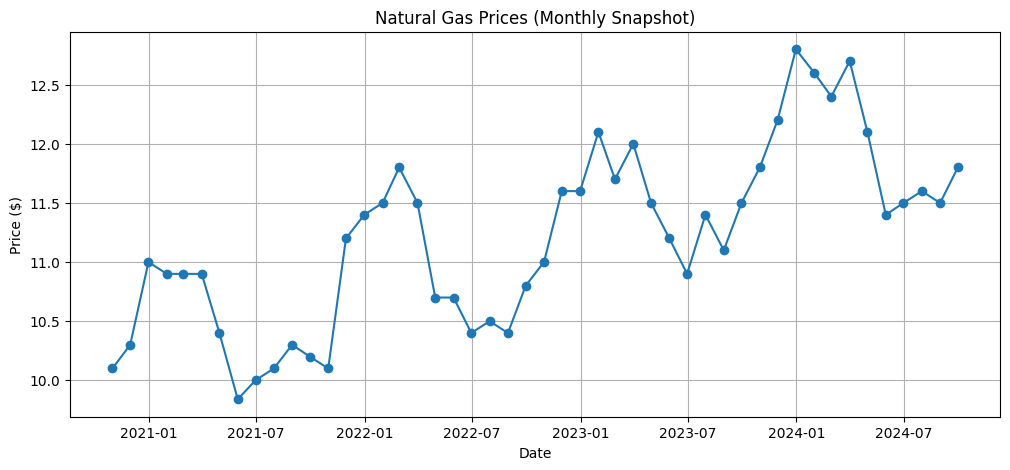

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Prices'], marker='o')
plt.title("Natural Gas Prices (Monthly Snapshot)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

In [ ]:
# Time Index in years
t0 = df.index.min()
df['t_years'] = (df.index - t0).days / 365.25

# linear regression using log-prices
y = np.log(df['Prices'])

# slope (b), intercept (a)
b, a = np.polyfit(df['t_years'], y, 1)

a, b


(np.float64(2.3323492423813126), np.float64(0.04190679788628937))

In [ ]:
#compute how each month differ
df['month'] = df.index.month

overall_mean = df['Prices'].mean()
monthly_avg = df.groupby('month')['Prices'].mean()

seasonal_factor = monthly_avg / overall_mean
seasonal_factor

,Prices
month,
1,1.050675
2,1.043983
3,1.050675
4,0.997137
5,0.962338
6,0.954753
7,0.972599
8,0.965907
9,0.988214


In [ ]:
import pandas as pd
import numpy as np

# trend parameters and seasonal factors
a_val = 2.3323492423813126
b_val = 0.04190679788628937
season_factors = seasonal_factor  # from earlier


def get_price(date_str):
    """
    Estimate natural gas price for any given date.
    Uses:
    - historical price if date exists in df
    - otherwise trend + seasonality model
    """

    # convert input to datetime
    date = pd.to_datetime(date_str)

    # if date is in historical data → return actual
    if date in df.index:
        return float(df.loc[date, 'Prices'])

    # compute t_years from first date t0
    t_years = (date - t0).days / 365.25

    # trend component
    trend_price = np.exp(a_val + b_val * t_years)

    # seasonality component
    month = date.month
    seasonal = season_factors.loc[month]

    # final price estimate
    return float(trend_price * seasonal)


In [ ]:
# historical date (should match actual)
print("2021-06-30:", get_price("2021-06-30"))

# near-future (in dataset range)
print("2024-09-30:", get_price("2024-09-30"))

# extrapolated future date
print("2025-03-15:", get_price("2025-03-15"))

# far future (1 year ahead)
print("2025-09-30:", get_price("2025-09-30"))


2021-06-30: 10.0
2024-09-30: 11.8
2025-03-15: 12.999335236511403
2025-09-30: 12.508921051615305
